# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [463]:
import pandas as pd

# После прочтения файла было обнаружено, что разделялись табуляцей, что и было добавлен параметр sep
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Получаем информацию и ознакомимся

In [464]:
data.head(100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14,5150000.0,47.0,2018-08-06T00:00:00,2,2.75,9.0,28.1,9,False,...,7.0,2.0,Санкт-Петербург,10142.0,13743.0,2.0,751.0,1.0,881.0,34.0
96,20,8780000.0,78.3,2018-08-24T00:00:00,3,2.50,15.0,51.0,9,NaN,...,11.0,NaN,Санкт-Петербург,52108.0,16333.0,0.0,NaN,1.0,746.0,31.0
97,15,4898000.0,146.0,2019-02-12T00:00:00,4,NaN,2.0,77.0,2,NaN,...,13.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,34.0
98,11,11700000.0,80.0,2014-12-10T00:00:00,3,NaN,5.0,55.1,3,NaN,...,11.0,0.0,Санкт-Петербург,11248.0,8767.0,1.0,666.0,0.0,NaN,831.0


Названия колонки в порядке, нет никаких посимвольных ошибок

Но не будем пренебергать числами, которые не совпадают с размером датафрейма, например, данные "is_apartment" начисляется 2775 как заполненные, а остальные (23699 - 2775 = 20924) не заполнены. Можно подтвердиться решением кода внизу:

In [465]:
data['is_apartment'].isna().sum()

20924

Как и остальные данные также будут претерпевать изменениями - предобработками данных

#### Построение гистограмм

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

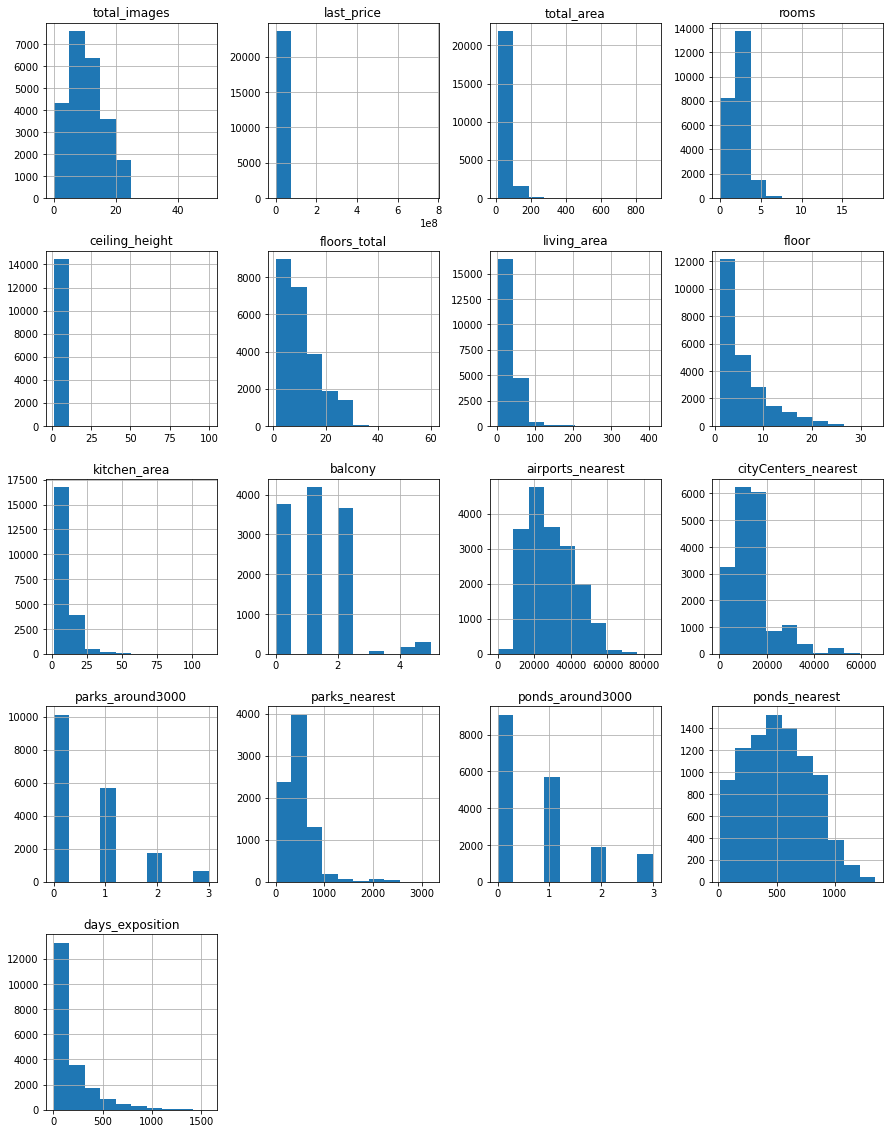

In [466]:
data.hist(figsize=(15, 20))

### Предобработка данных

#### Удаление пропусков

In [467]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Можно заметить, что в столбцах есть пропущения: 
- ceiling_height - "высота потолка", 

- floors_total - "всего этажей в доме"

- living_area - "жилая площадь в квадратных метрах (м²)", 

- is_apartment - "апартаменты (булев тип)", 

- kitchen_area - "площадь кухни в квадратных метрах (м²)", 

- balcony - "количество балкона", 

- locality_name - "название населённого пункта", 

- airports_nearest - "расстояние до ближайшего аэропорта в метрах (м)", 

- cityCenters_nearest - "расстояние до центра города (м)", 

- parks_around3000 - "число парков в радиусах 3 км"

- parks_nearest - "расстояние до ближайшего парка (м)"

- ponds_around3000 - "число водоёмов в радиусе 3 км"

- ponds_nearest - "расстояние до ближайшего водоёма (м)"

- days_exposition - "сколько дней было размещено объявление (от публикации до снятия)"

Идея и действия с пропусками:

- Высоту потолка можно поставить медианное значение

- ~~Кол-во этажей в доме можно поставить медианное значение~~
- Кол-во этажей оставим пустыми, но сделать его целочисленными типами

- Жилую площадку также можно поставить медианное значение

- ~~Аппартаменты можно по умолчанию ставить 0, т.е. данная квартира не является аппартаментом~~

- С аппартаментом спорный вопрос, лучше оставить их пустыми (т.к. эти данные являются категоризациями). Сделать его булевыми типами

- Площадь кухни можно поставить медианное значение

- По рекомендацию количество балкона можно поставить как 0. Но сделать его целочисленными типами

- Пустое значение населенного пункта оставить как и есть (т.к. является катогеризацией), а неявные дубликаты устраняем

- Расстояние до ближайшего аэропорта оставим пустым, т.к. неизвестно где располагается недвижимость

- Расстояние до центра города аналогично с расстоянием до ближайшего аэропорта

- Число парков можно аналогично с предыдущим пунктом. Но сделать его целочисленными типами

- Расстояние ближайшего парка аналогично с предыдущим пунктом

- Число водоемов можно аналогично с предыдущим пунктом. Но сделать его целочисленными типами

- Расстояние до ближайшего водоема оставим пустым, т.к. неизвестно где располагается недвижимость

- Срок публикации аналогично оставим пустым, т.к. у каждого дома есть свой уникальный срок публикации, поэтому нельзя полагаться на медианное значение и любые приближенные значения

В проектах ГК ПИК высота потолков в квартирах находится в диапазоне 2,6 - 3,1 м, замечает Сергей Ковров.

Однако максимальная высота потолков, как правило, не регламентируется,
но чаще всего она в современной застройке не превышает 3,2 метра. 
В старых домах с увеличенными габаритами и площадью потолки могут быть 4 метра высотой и более.

In [468]:
# Смотрим, какая высота потолка самая распространенная
data['ceiling_height'].value_counts()

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Здесь получилось, что распространенной высоты потолка является 2,5 

In [469]:
# Не все данные показывают, узнаем через метод unique
print(data['ceiling_height'].sort_values().unique())

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

Но можно заметить, что существуют дома, потолки которого превышают не только 3,2 метра, но и меньше 2,5 метров. Устраним их

In [470]:
# Устраняем данные дома, в котором высота потолки не находится в этом диапазоне 2,5 - 3,2, 
# но за исключением выше 24, 25, 26, 27, 27,5, 32,0.
data = data[((data['ceiling_height'] > 2.5) & (data['ceiling_height'] <= 3.2)) | (data['ceiling_height'] >= 24)]

# Уменьшаем в 10 раз для домов, у которых потолки выше 24 метров
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = data['ceiling_height'] / 10

# Устраняем дом, у которого потолок 10 метр
data = data[data['ceiling_height'] != 10]

In [471]:
# Проверим и убедимся, что аномальных значений нет
print(data['ceiling_height'].sort_values().unique())

[2.4  2.5  2.51 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62
 2.63 2.64 2.65 2.66 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76
 2.77 2.78 2.79 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9
 2.91 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04
 3.05 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18
 3.2 ]


In [472]:
# Заполним пропуски медианные значения высоты потолка
print('Медианное значение высоты потолка:', data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Медианное значение высоты потолка: 2.7


In [473]:
# Заполним пропуски медианные значения жилой площади
print('Медианное значение:', data['living_area'].median())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

data['living_area'].value_counts()

Медианное значение: 31.0


31.00     689
18.00     316
20.00     249
17.00     234
30.00     221
         ... 
170.00      1
22.57       1
12.90       1
36.07       1
17.49       1
Name: living_area, Length: 1183, dtype: int64

In [474]:
# Заполним пропуски медианные значения площади кухни
print('Медианное значение площади кухни:', data['kitchen_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

data['kitchen_area'].value_counts()

Медианное значение площади кухни: 10.0


10.00    1263
9.00      445
8.00      434
11.00     413
7.00      368
         ... 
15.61       1
13.93       1
3.50        1
12.56       1
16.38       1
Name: kitchen_area, Length: 635, dtype: int64

In [475]:
# Обнаружили, что кол-во балконов является вещественными числами, их нужно сделать целочисленными типами
# Заполним пропуски количеств балконов как отстутствие (0)
data['balcony'] = data['balcony'].fillna(0).astype('Int64')

data['balcony'].value_counts()

0    5741
2    2052
1    1962
5     195
4     115
3      54
Name: balcony, dtype: Int64

In [476]:
# Посчитаем дубликаты
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].duplicated().sum()

9877

#### Изменение данных названий населенного пункта

In [477]:
# Получим уникальные названий населенного пункта
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок советский',
       'городской посёлок фёдоровское', 'городской посёлок янино-1',
       'деревня агалатово', 'деревня батово', 'деревня бегуницы',
       'деревня белогорка', 'деревня большая вруда',
       'деревня большие колпаны', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня гарболово', 'деревня глинка', 'деревня горбунки',
       'деревня гостилицы', 'деревня заневка', 'деревня зимитицы',
       'деревня извара', 'деревня калитино', 'деревня кальтино',
       'деревня ка

Создадим новую колонку, в которой находятся только названия без дополнительных пояснений вроде того "поселок" и т.д.

In [478]:
def locality_name(row):
    try:
        if 'городской поселок' in row:
            return row.replace('городской поселок ', '')
        elif 'городской посёлок' in row:
            return row.replace('городской посёлок ', '')
        elif 'деревня' in row:
            return row.replace('деревня ', '')
        elif 'поселок городского типа' in row:
            return row.replace('поселок городского типа ', '')
        elif 'посёлок городского типа' in row:
            return row.replace('посёлок городского типа ', '')
        elif 'поселок' in row:
            return row.replace('поселок ', '')
        elif 'посёлок' in row:
            return row.replace('посёлок ', '')
        elif 'село' in row:
            return row.replace('село ', '')
        elif 'садовое товарищество ' in row:
            return row.replace('садовое товарищество ', '')
        elif 'nan' in row:
            return 'Неизвестное'
        else:
            return row
    except:
        return 'нет категории'

data['locality_good_name'] = data['locality_name'].apply(locality_name)

In [479]:
# Получим уникальные названий населенного пункта
data['locality_good_name'].sort_values().unique()

array(['агалатово', 'александровская', 'аннино', 'барышево', 'батово',
       'бегуницы', 'белогорка', 'бокситогорск', 'большая вруда',
       'большая ижора', 'большие колпаны', 'бор', 'борисова грива',
       'бугры', 'будогощь', 'ваганово', 'важины', 'вартемяги',
       'вахнова кара', 'виллози', 'войсковицы', 'волосово', 'волхов',
       'всеволожск', 'выборг', 'вырица', 'гарболово', 'гатчина',
       'гладкое', 'глинка', 'гончарово', 'горбунки', 'гостилицы',
       'громово', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпосёлок', 'заневка',
       'запорожское', 'зеленогорск', 'зимитицы', 'ивангород', 'извара',
       'ильичёво', 'имени морозова', 'имени свердлова', 'калитино',
       'кальтино', 'каменногорск', 'камышовка', 'каськово', 'келози',
       'кикерино', 'кингисепп', 'кипень', 'кириши', 'кировск', 'кисельня',
       'кобралово', 'колпино', 'колтуши', 'коммунар', 'коммунары',
       'копорье', 'коркино', 'коробицыно', 

In [480]:
# Проверим и убедимся, что заполнили пропущенные значения
data['locality_good_name'].isna().sum()

0

Можно заметить, что колонка is_apartment не является булевым типом, следовательно, нужно исправить её

In [481]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [482]:
# Проверим, есть ли в других местах False
data['is_apartment'].value_counts()

True     8716
False    1403
Name: is_apartment, dtype: int64

In [483]:
# Кол-во этажей является вещественными числами, их нужно сделать целочисленными типами
data['floors_total'] = data['floors_total'].astype('Int64')

In [484]:
# Число парков в радиусах 3 км является вещественными числами, их нужно сделать целочисленными типами
data['parks_around3000'] = data['parks_around3000'].astype('Int64')

In [485]:
# Число водоемов в радиусах 3 км является вещественными числами, их нужно сделать целочисленными типами
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')

In [486]:
# Проверим и убедимся, что заполнили пропущенные значения в некоторых колонках
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               9
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             12
airports_nearest        1925
cityCenters_nearest     1910
parks_around3000        1909
parks_nearest           6470
ponds_around3000        1909
ponds_nearest           5956
days_exposition         1623
locality_good_name         0
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

In [487]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_good_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,санкт-петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,санкт-петербург
10,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,True,...,0,санкт-петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,санкт-петербург
13,20,3550000.0,42.8,2017-07-01T00:00:00,2,2.56,5,27.0,5,True,...,1,петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0,петергоф
16,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5,55.6,1,True,...,0,санкт-петербург,22108.0,10698.0,3,420.0,0,NaN,397.0,санкт-петербург


In [488]:
# Цена одного квадратного метра = цена на момент снятия с публикации / общая площадь квартиры в квадратных метрах (м²)

data['price_of_one_square_meter'] = data['last_price'] / data['total_area']
data['price_of_one_square_meter']

0        120370.370370
4        100000.000000
10       127525.252525
13        82943.925234
16        81707.317073
             ...      
23688     91089.108911
23689    100566.572238
23691    129903.978052
23693     73717.948718
23697    149511.400651
Name: price_of_one_square_meter, Length: 10119, dtype: float64

In [489]:
# Преобразуем в правильный формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y/%m/%d %H:%M:')

In [490]:
# Конвентируем в дни недели - дни публикации
data['day_of_publication'] = data['first_day_exposition'].dt.day_name()

# Конвентируем в дни недели - месяц публикации
data['month_of_publication'] = data['first_day_exposition'].dt.month_name()

# Конвентируем в дни недели - год публикации
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [491]:
data['type_floor'] = 'Другой'

# Первый
data.loc[data['floor'] == 1, 'type_floor'] = 'Первый'

# Последний
data.loc[data['floor'] == data['floors_total'], 'type_floor'] = 'Последний'

In [492]:
# Проверяем и убедимся, что в данных содержатся 3 типа
data['type_floor'].unique()

array(['Другой', 'Последний', 'Первый'], dtype=object)

In [493]:
# Расстояние до центра города в километрах
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

In [494]:
# Здесь можно заметить, что существуют данные, в которых количество комната равно нулю
data[data['rooms'] == 0].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_good_name,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication,type_floor,cityCenters_nearest_km
697,12,2500000.0,24.1,2017-12-01,0,2.75,25,17.5,21,True,...,<NA>,NaN,201.0,кудрово,103734.439834,Friday,December,2017,Другой,NaN
716,5,1500000.0,17.0,2017-06-07,0,2.70,9,12.0,1,True,...,0,NaN,40.0,шушары,88235.294118,Wednesday,June,2017,Первый,30.0
839,14,1900000.0,35.0,2017-04-14,0,2.70,5,15.0,3,False,...,<NA>,NaN,7.0,новый свет,54285.714286,Friday,April,2017,Другой,NaN
1174,3,3900000.0,32.0,2016-10-18,0,2.70,24,18.0,2,True,...,0,NaN,540.0,санкт-петербург,121875.000000,Tuesday,October,2016,Другой,8.0
1220,5,3300000.0,27.0,2017-11-10,0,2.80,17,20.0,16,True,...,1,528.0,113.0,санкт-петербург,122222.222222,Friday,November,2017,Другой,12.0


In [495]:
# Это является ошибочной, заменим 0 на NaN
data.loc[data['rooms'] == 0, 'rooms'] = None
data['rooms'] = data['rooms'].astype('Int64')

In [496]:
# Проверим на пропущенные значения
data['rooms'].isna().sum()

75

In [497]:
# Проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_good_name,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2,755.0,NaN,санкт-петербург,120370.370370,Thursday,March,2019,Другой,16.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1,48.0,121.0,санкт-петербург,100000.000000,Tuesday,June,2018,Другой,8.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,2,553.0,137.0,санкт-петербург,127525.252525,Thursday,November,2017,Другой,14.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,3,298.0,366.0,петергоф,82943.925234,Saturday,July,2017,Последний,33.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,True,...,0,NaN,397.0,санкт-петербург,81707.317073,Thursday,November,2017,Первый,11.0


In [498]:
# Все данные подправлены и заполнены, теперь можно приступать к исследованию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10119 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               10119 non-null  int64         
 1   last_price                 10119 non-null  float64       
 2   total_area                 10119 non-null  float64       
 3   first_day_exposition       10119 non-null  datetime64[ns]
 4   rooms                      10044 non-null  Int64         
 5   ceiling_height             10119 non-null  float64       
 6   floors_total               10110 non-null  Int64         
 7   living_area                10119 non-null  float64       
 8   floor                      10119 non-null  int64         
 9   is_apartment               10119 non-null  bool          
 10  studio                     10119 non-null  bool          
 11  open_plan                  10119 non-null  bool          
 12  kitc

### Проведите исследовательский анализ данных

<AxesSubplot:ylabel='Frequency'>

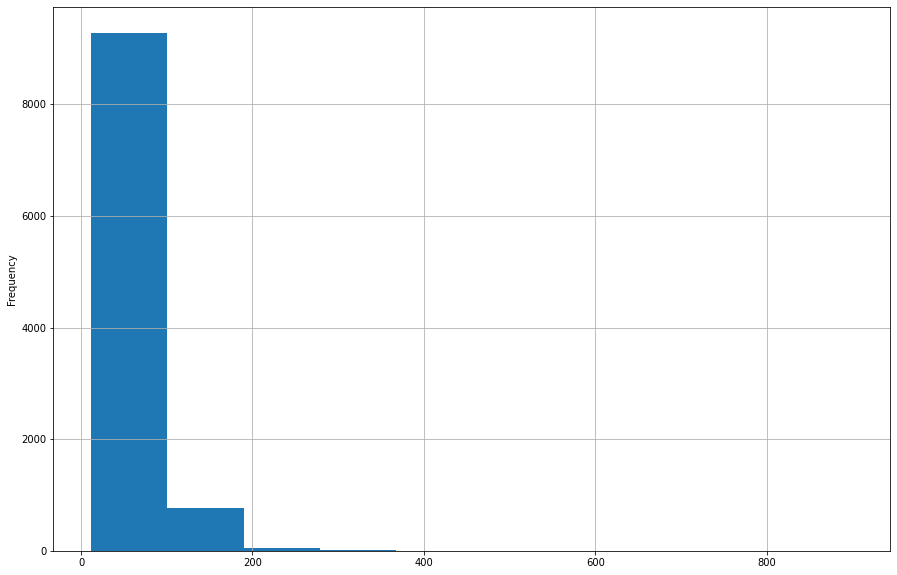

In [499]:
data['total_area'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что площадь ~100 м^2 является огромной количествой в домах

<AxesSubplot:ylabel='Frequency'>

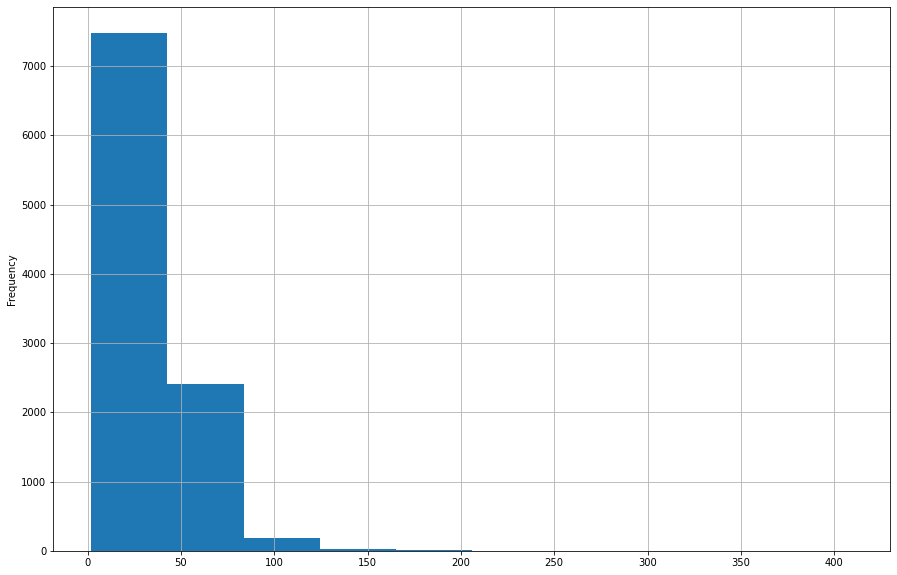

In [500]:
data['living_area'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что здесь жилая площадь 0-40 м^2 является огромной количествой в домах, но 50-70 м^2 также обладает немалым количеством

<AxesSubplot:ylabel='Frequency'>

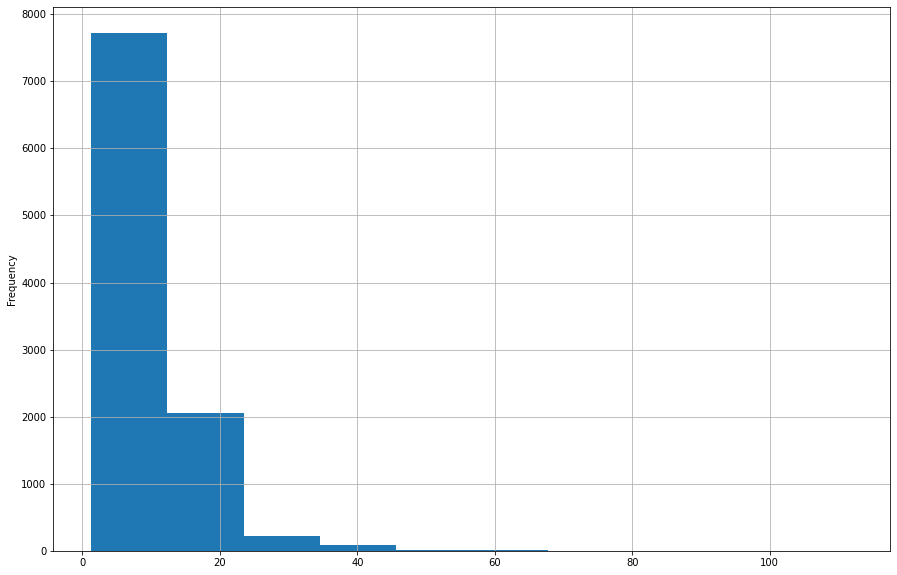

In [501]:
data['kitchen_area'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что здесь жилая площадь 0-10 м^2 является огромной количествой в домах, но 10-25 м^2 также обладает немалым количеством. Нельзя отрицать, что существуют дома, которые есть кухня с площадью более 25 м^2

In [502]:
data['last_price'].value_counts().sort_values(ascending = False)

4500000.0     150
5500000.0     119
4300000.0     110
3500000.0     107
5000000.0     105
             ... 
5205000.0       1
6480000.0       1
10860000.0      1
10490000.0      1
2160000.0       1
Name: last_price, Length: 1800, dtype: int64

In [503]:
# data['last_price'].hist(figsize = (15, 10))

Можно заметить, что здесь жилая площадь 0-10 м^2 является огромной количествой в домах, но 10-25 м^2 также обладает немалым количеством. Нельзя отрицать, что существуют дома, которые есть кухня с площадью более 25 м^2

In [504]:
data['rooms'].value_counts().sort_values(ascending = False)

1     3379
2     3328
3     2625
4      521
5      129
6       39
7       11
9        5
8        2
10       2
16       1
12       1
14       1
Name: rooms, dtype: Int64

<AxesSubplot:ylabel='Frequency'>

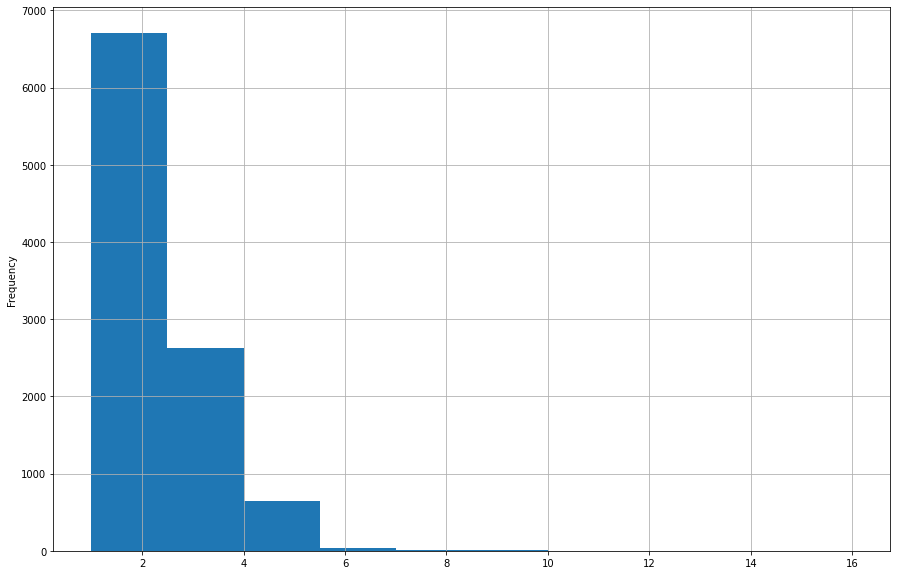

In [505]:
data['rooms'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что здесь часто всего встречается двухкомнатный дом, но 2 место по количеству комнат занимает однокомнатный дом

<AxesSubplot:ylabel='Frequency'>

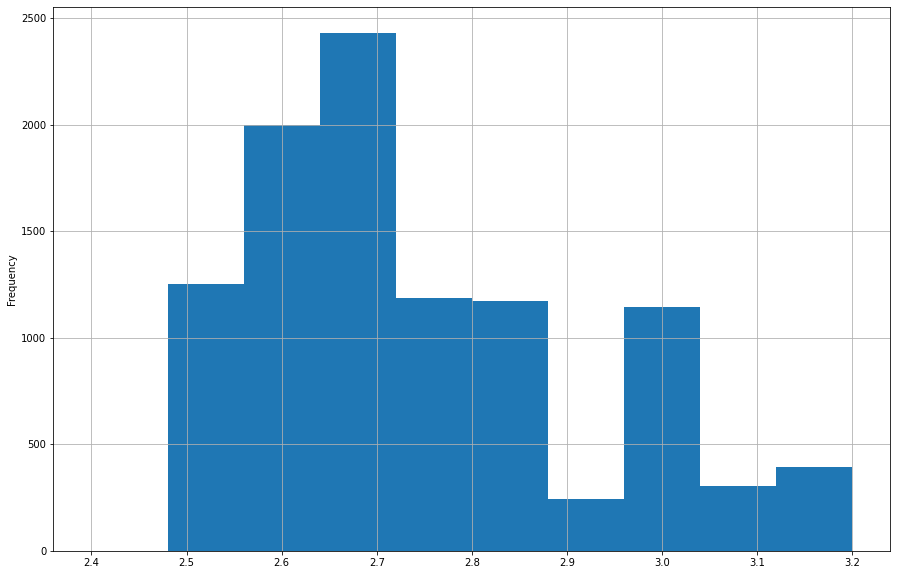

In [506]:
data['ceiling_height'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что здесь самая распростренненая высота потолка является ~2,7 метра. Самая редкая высота - ~2,9 метра

<AxesSubplot:ylabel='Frequency'>

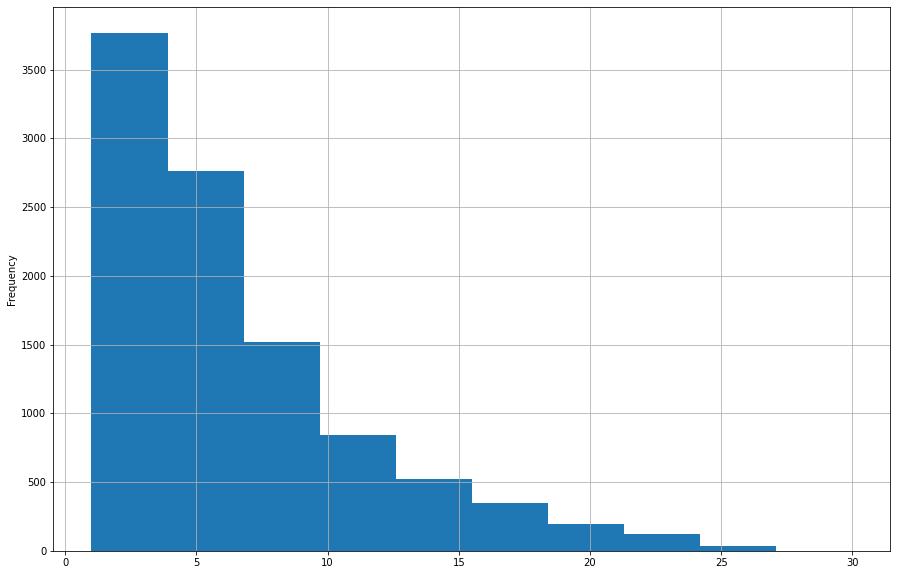

In [507]:
data['floor'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что здесь самое распространенное предложение приобрести комнату, у которой этаж не более 4

<AxesSubplot:>

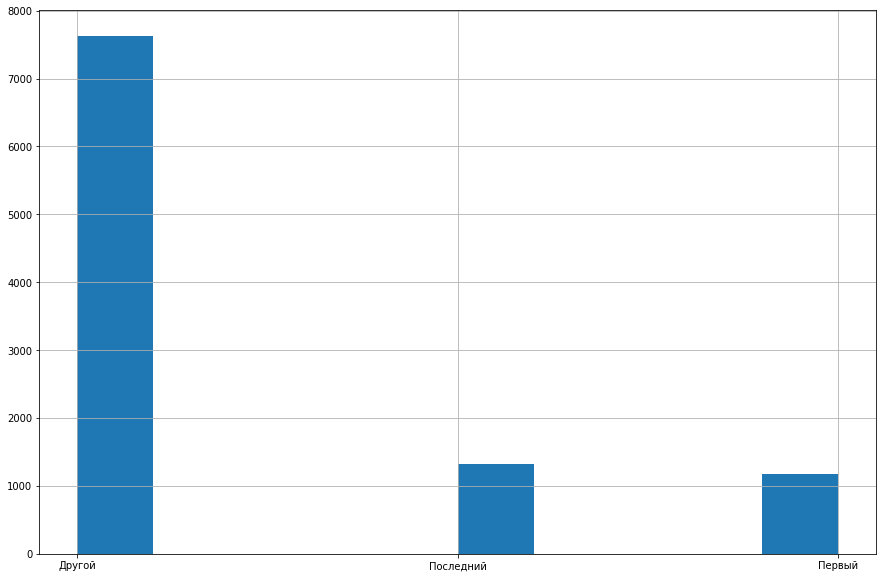

In [508]:
data['type_floor'].hist(figsize = (15, 10))

Можно заметить, что здесь самый предложенный вариант дома, этаж у которого не является ни первого, ни последнего. Однако последний этаж дома по количеству предложенного варианта не уступает первому этажу

<AxesSubplot:ylabel='Frequency'>

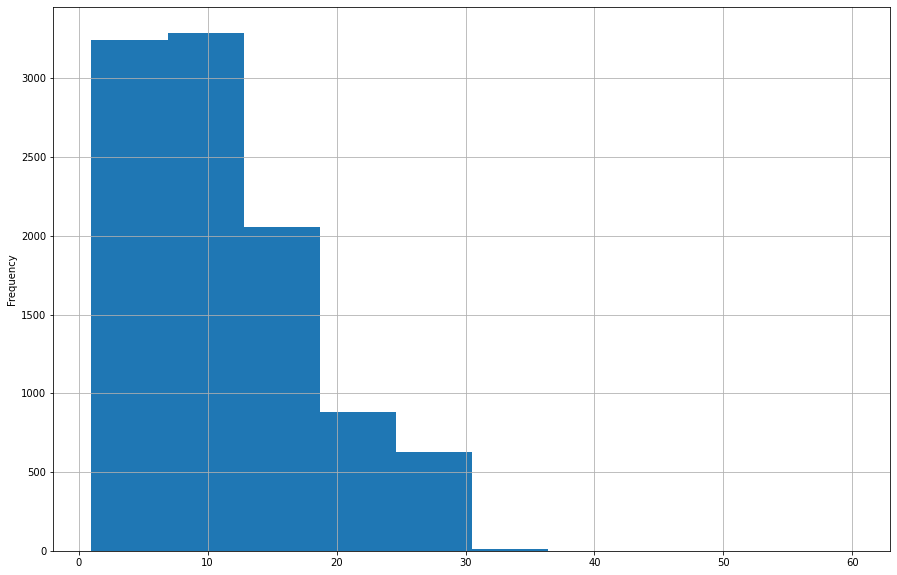

In [509]:
data['floors_total'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что здесь самый распростренненый тип дома, у которого 10 этажей. Самый редкий - более 30 этажей

<AxesSubplot:ylabel='Frequency'>

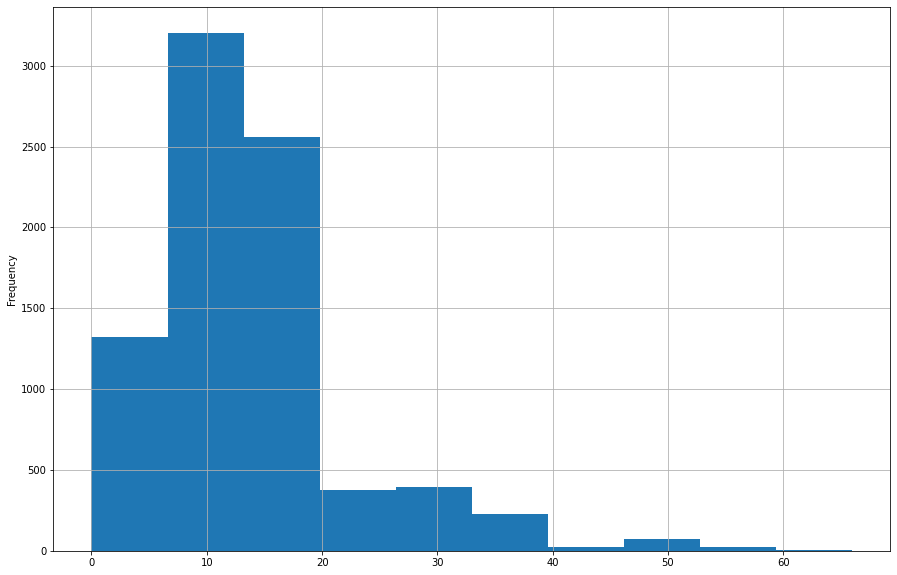

In [510]:
data['cityCenters_nearest_km'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что здесь существуют много дома, который располагается около 10 км от центра города. А самый редкий - около 45 и более 55 км от центра города

<AxesSubplot:ylabel='Frequency'>

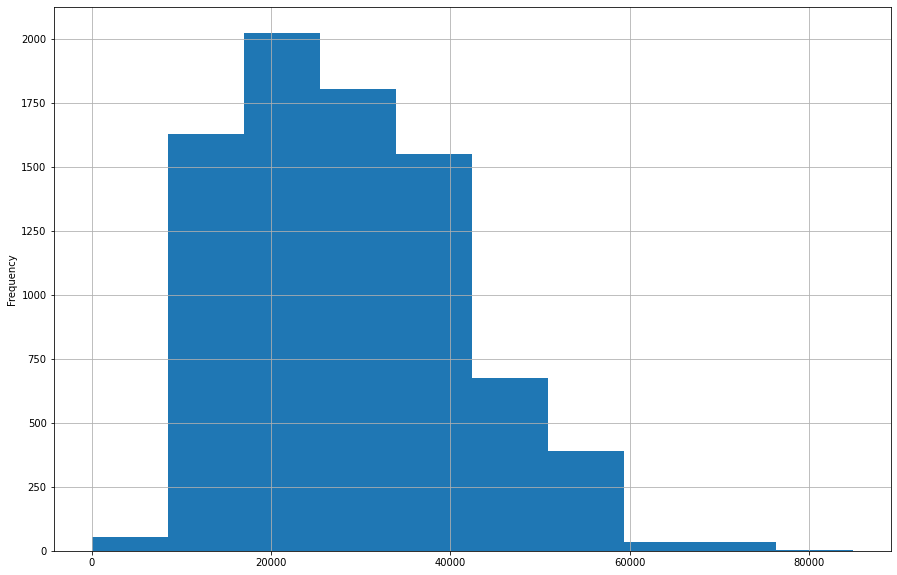

In [511]:
data['airports_nearest'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что здесь часто встречается дом, расстояние которого до аэропорта около 20 км. Но нелья отрицать, что есть внушительные количество домов, расстояние которых до аэропорта около 15 км и 40 км. Самый редкое - более 60 км.

<AxesSubplot:ylabel='Frequency'>

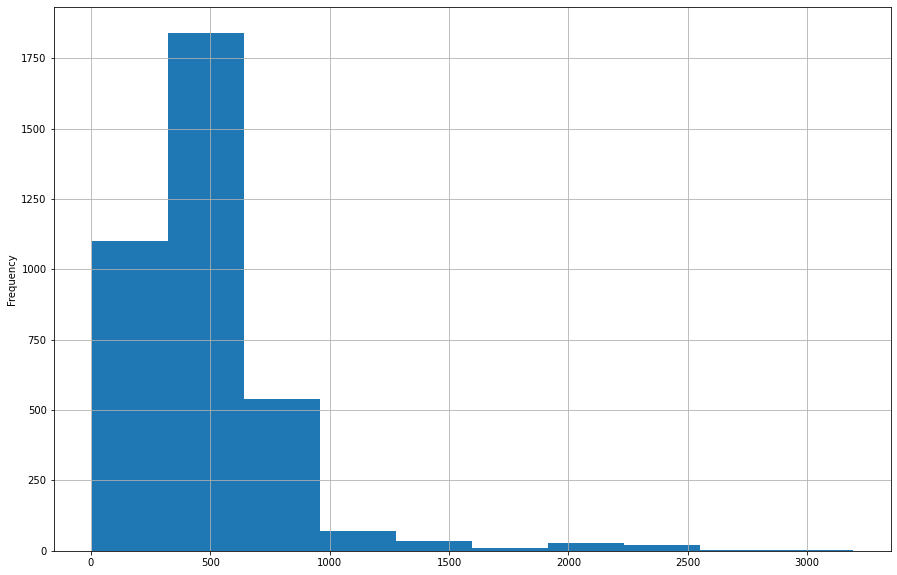

In [512]:
data['parks_nearest'].plot(kind = 'hist', figsize = (15, 10), grid = True)

Можно заметить, что здесь часто встречается дом, расстояние которого до ближайшего парка около 0,5 км. Второе место по количеству занимает дома, у которого расстояние в шаговой доступности - около 0,25 км. 
Однако существуют малое количество дома, расстояние которого до ближайшего парка более 1 км.

<AxesSubplot:>

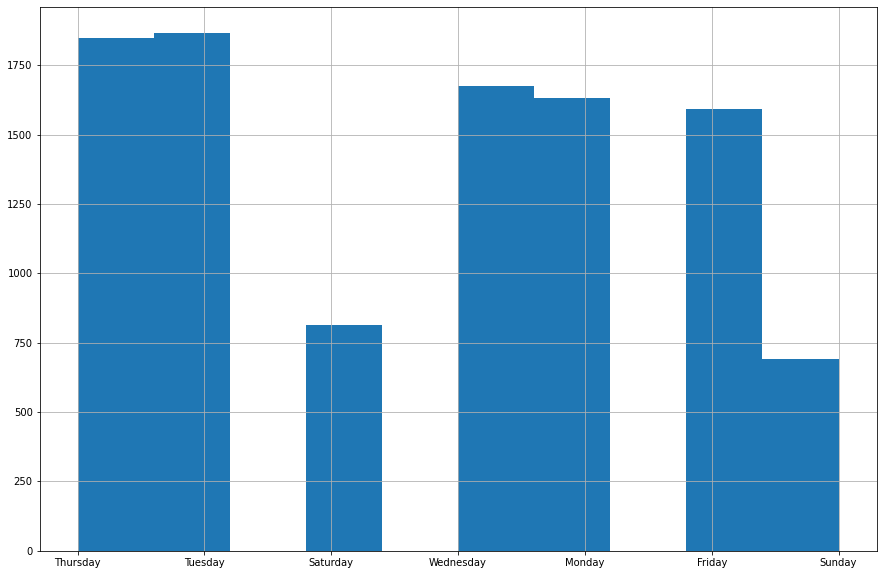

In [513]:
data['day_of_publication'].hist(figsize = (15, 10))

Можно заметить, что здесь часто публикуется объявления - вторник, и примерное одинаковое количество публикации у вторника - четверг. Далее, приближенное одинаковое число по публикации - среда, понедельник и пятница, но меньше по количеству предыдующей публикации (вторник и четверг).
Число публикации в субооту меньше остальных по количеству, но не уступает количеству воскресенья (воскресенье - самое малое количество по публикации объявлений)

<AxesSubplot:>

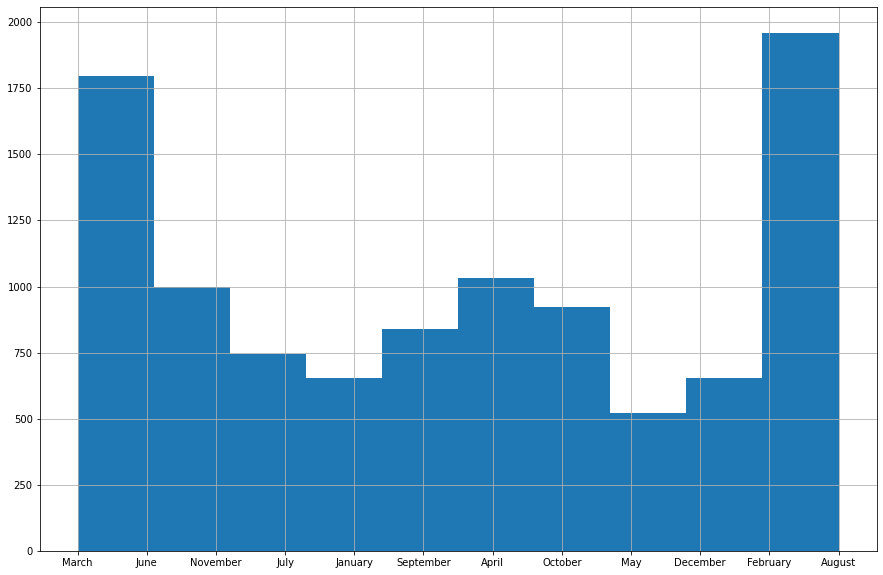

In [514]:
data['month_of_publication'].hist(figsize = (15, 10))

Можно заметить, что здесь часто публикуется объявления - август. Чуть меньше по количеству - март. Далее, усредненное количество по числу публикации занимает - апрель, и его приближенное значение июнь.
Самое малое количество объявление - май

<AxesSubplot:>

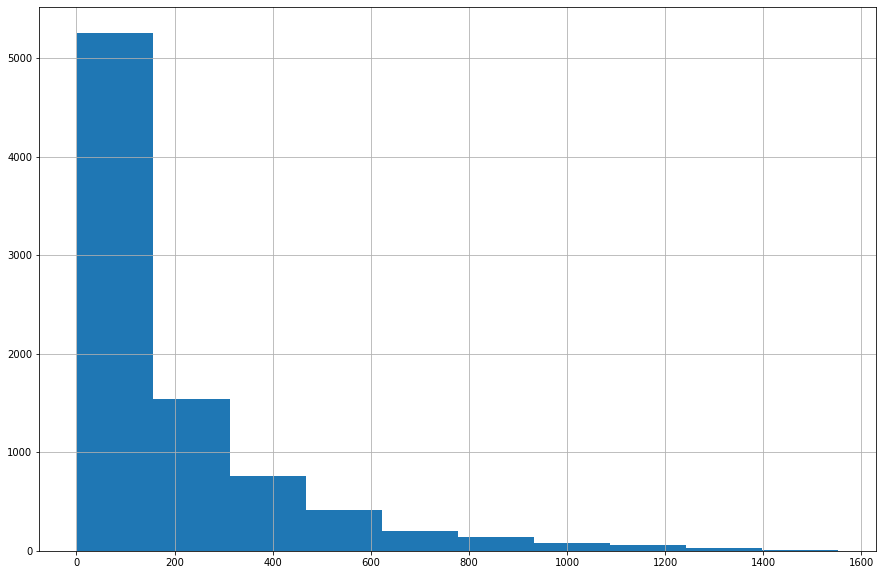

In [515]:
data['days_exposition'].hist(figsize = (15, 10))

Можно заметить, что здесь часто продавались квартиры с момента снятия публикации - около 100 дней. Далее резко снизилась частота по продажам - около 200 дней. Данный график можно рассмотреть как распределение Пуассона. Чем дольше висит в объявлениях о продажах, тем ниже шанс продавать.

In [516]:
print('Средний срок дни по продажам дома:', data['days_exposition'].mean())
print('Медианный срок дни по продажам дома:', data['days_exposition'].median())

Средний срок дни по продажам дома: 193.1886770244821
Медианный срок дни по продажам дома: 105.0


Средний срок дни, это говорит о том, что любой дом может снять с публикации о продажи в течение около 193 дней.
По этому сроку можно рассматривать как обычный и средний срок по продажам.

А медианный срок дни по прадажам составляет 105 дней, это говорит о том, что будет часто встречать в объявлениях такой срок, что дом будет снят с публикации о продажи в течение 105 дней.

Здесь находим факторы, больше всего влияющих на общую (полную) стоимость объекта. Для подготовки данных перед визуализацией мы используем сводные таблицы.

In [517]:
cost_factors_of_object = data.pivot_table(index = ['first_day_exposition','type_floor'], values = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms'])

cost_factors_of_object.head(15)

kitchen_area    last_price  living_area  \
first_day_exposition type_floor                                            
2014-11-27           Другой         16.585000  1.451384e+07       55.465   
                     Первый         16.225000  8.992500e+06       39.255   
                     Последний      27.990000  9.750965e+06       45.620   
2014-11-29           Первый         10.030000  5.500000e+06       30.040   
2014-12-08           Другой         12.900000  1.584950e+07       49.850   
2014-12-09           Другой         18.760714  1.573562e+07       41.080   
                     Последний      35.950000  3.660000e+07       93.000   
2014-12-10           Другой         12.684000  9.692000e+06       57.390   
                     Первый          9.150000  5.225000e+06       36.100   
2014-12-11           Другой         16.000000  8.417500e+06       51.675   
2014-12-12           Другой          8.600000  6.200000e+06       54.000   
                     Последний       9.000000  2.300000e+06       33.200   
2014-12-14           Другой         11.705000  6.090000e+06       32.315   
2014-12-15           Другой         21.250000  1.465000e+07       55.750   
                     Последний      12.750000  6.500000e+06       64.110   

                                    rooms  total_area  
first_day_exposition type_floor                        
2014-11-27           Другой           2.5  104.725000  
                     Первый           2.0   74.110000  
                     Последний        2.5   94.725000  
2014-11-29           Первый           2.0   53.400000  
2014-12-08           Другой           2.5   89.100000  
2014-12-09           Другой      2.142857   84.335714  
                     Последний        3.0  148.550000  
2014-12-10           Другой           3.1   98.930000  
                     Первый           2.5   61.550000  
2014-12-11           Другой           3.0   88.285000  
2014-12-12           Другой           3.0   79.300000  
                     Последний        2.0   50.800000  
2014-12-14           Другой           2.0   61.915000  
2014-12-15           Другой           3.0  112.000000  
                     Последний        3.0   85.015000

In [518]:
test = data[data['first_day_exposition'] == '2014-11-27']
test = test[test['type_floor'] == 'Другой']
test.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_good_name,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication,type_floor,cityCenters_nearest_km
3486,2,14500000.0,97.4,2014-11-27,2,3.00,8,36.30,2,False,...,0,NaN,1078.0,санкт-петербург,148870.636550,Thursday,November,2014,Другой,11.0
3955,1,12561120.0,93.6,2014-11-27,3,3.00,16,52.00,5,True,...,2,454.0,583.0,санкт-петербург,134200.000000,Thursday,November,2014,Другой,8.0
4812,1,27933600.0,180.8,2014-11-27,4,3.10,16,94.89,11,True,...,2,454.0,586.0,санкт-петербург,154500.000000,Thursday,November,2014,Другой,8.0
13246,1,14000000.0,142.0,2014-11-27,3,2.77,5,95.70,4,True,...,1,77.0,1341.0,санкт-петербург,98591.549296,Thursday,November,2014,Другой,12.0
15427,2,3550000.0,34.0,2014-11-27,1,2.55,9,18.90,7,False,...,1,504.0,1149.0,санкт-петербург,104411.764706,Thursday,November,2014,Другой,14.0


In [519]:
test['last_price'].mean()

14513845.0

In [520]:
# Видим, что колонка last_price не удобная для отображения, попробуем заменить на исчисляемое как "млн"
def last_price_mln(row):
    try:
        return (row / 1000000).mean()
    except:
        return 'нет категории'

data['last_price_mln'] = data['last_price'].apply(last_price_mln)

In [521]:
def name_floor(row):
    try:
        row = 'Другой'

        # Первый
        data.loc[data['floor'] == 1, 'type_floor'] = 'Первый'

        # Последний
        data.loc[data['floor'] == data['floors_total'], 'type_floor'] = 'Последний'
    except:
        return 'нет категории'

In [522]:
cost_factors_of_object = data.pivot_table(index = ['first_day_exposition', 'type_floor'], values = ['floor', 'last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'day_of_publication', 'month_of_publication', 'year_of_publication'], aggfunc = {'type_floor': 'count', 'last_price': last_price_mln, 'total_area': 'mean', 'living_area': 'mean', 'kitchen_area': 'mean', 'rooms': 'mean', 'day_of_publication': 'count', 'month_of_publication': 'count', 'year_of_publication': 'count'})

In [523]:
cost_factors_of_object.columns

Index(['day_of_publication', 'kitchen_area', 'last_price', 'living_area',
       'month_of_publication', 'rooms', 'total_area', 'type_floor',
       'year_of_publication'],
      dtype='object')

In [524]:
# Переимениуем колонку
cost_factors_of_object.columns = ['type_floor', 'last_price_mln','total_area', 'living_area', 'kitchen_area', 'rooms', 'day_of_publication', 'month_of_publication', 'year_of_publication']

In [525]:
# Смотрим и проверяем
cost_factors_of_object.head(15)

type_floor  last_price_mln  total_area  \
first_day_exposition type_floor                                           
2014-11-27           Другой               6       16.585000   14.513845   
                     Первый               2       16.225000    8.992500   
                     Последний            2       27.990000    9.750965   
2014-11-29           Первый               1       10.030000    5.500000   
2014-12-08           Другой               2       12.900000   15.849500   
2014-12-09           Другой              14       18.760714   15.735620   
                     Последний            2       35.950000   36.600000   
2014-12-10           Другой              10       12.684000    9.692000   
                     Первый               2        9.150000    5.225000   
2014-12-11           Другой               2       16.000000    8.417500   
2014-12-12           Другой               1        8.600000    6.200000   
                     Последний            1        9.000000    2.300000   
2014-12-14           Другой               2       11.705000    6.090000   
2014-12-15           Другой               2       21.250000   14.650000   
                     Последний            2       12.750000    6.500000   

                                 living_area  kitchen_area     rooms  \
first_day_exposition type_floor                                        
2014-11-27           Другой           55.465             6       2.5   
                     Первый           39.255             2       2.0   
                     Последний        45.620             2       2.5   
2014-11-29           Первый           30.040             1       2.0   
2014-12-08           Другой           49.850             2       2.5   
2014-12-09           Другой           41.080            14  2.142857   
                     Последний        93.000             2       3.0   
2014-12-10           Другой           57.390            10       3.1   
                     Первый           36.100             2       2.5   
2014-12-11           Другой           51.675             2       3.0   
2014-12-12           Другой           54.000             1       3.0   
                     Последний        33.200             1       2.0   
2014-12-14           Другой           32.315             2       2.0   
2014-12-15           Другой           55.750             2       3.0   
                     Последний        64.110             2       3.0   

                                 day_of_publication  month_of_publication  \
first_day_exposition type_floor                                             
2014-11-27           Другой              104.725000                     6   
                     Первый               74.110000                     2   
                     Последний            94.725000                     2   
2014-11-29           Первый               53.400000                     1   
2014-12-08           Другой               89.100000                     2   
2014-12-09           Другой               84.335714                    14   
                     Последний           148.550000                     2   
2014-12-10           Другой               98.930000                    10   
                     Первый               61.550000                     2   
2014-12-11           Другой               88.285000                     2   
2014-12-12           Другой               79.300000                     1   
                     Последний            50.800000                     1   
2014-12-14           Другой               61.915000                     2   
2014-12-15           Другой              112.000000                     2   
                     Последний            85.015000                     2   

                                 year_of_publication  
first_day_exposition type_floor                       
2014-11-27           Другой                        6  
                     Первый                        2  
  

Построим графики, которые покажут зависимость цены от указанных ниже параметров. 

array([[<AxesSubplot:title={'center':'type_floor'}>,
        <AxesSubplot:title={'center':'last_price_mln'}>,
        <AxesSubplot:title={'center':'total_area'}>],
       [<AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'day_of_publication'}>,
        <AxesSubplot:title={'center':'month_of_publication'}>,
        <AxesSubplot:title={'center':'year_of_publication'}>]],
      dtype=object)

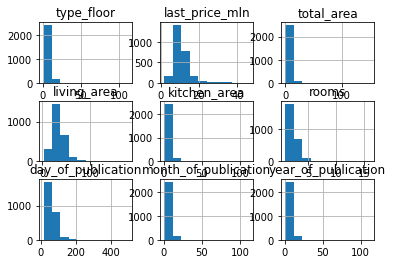

In [526]:
cost_factors_of_object.hist()

<AxesSubplot:ylabel='Frequency'>

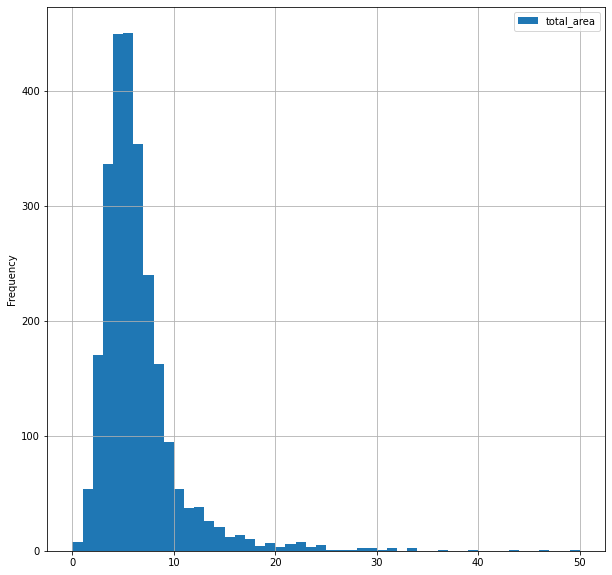

In [527]:
cost_factors_of_object.plot(kind = 'hist', x = 'last_price_mln', y = 'total_area', figsize = (10, 10), grid = True, bins = 50, range = (0, 50))

<AxesSubplot:ylabel='Frequency'>

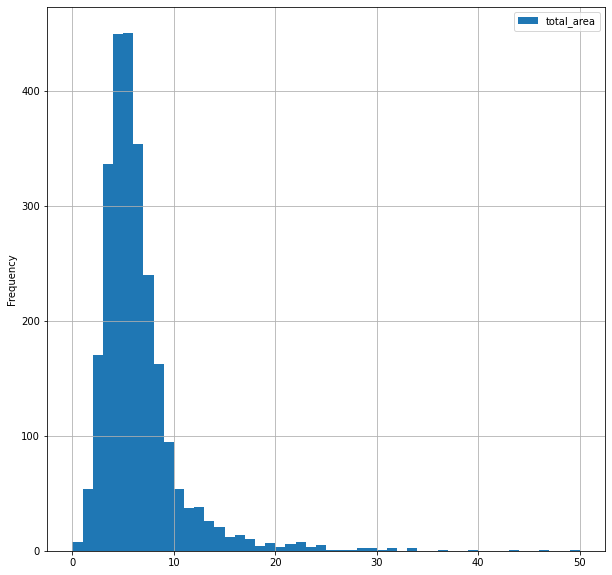

In [528]:
cost_factors_of_object.plot(kind = 'hist', x = 'last_price_mln', y = 'total_area', figsize = (10, 10), grid = True, bins = 50, range = (0, 50))

Здесь можно заметить, что самая распространенная общая площадь в среднем будет стоить 6 млн рублей 

<AxesSubplot:ylabel='Frequency'>

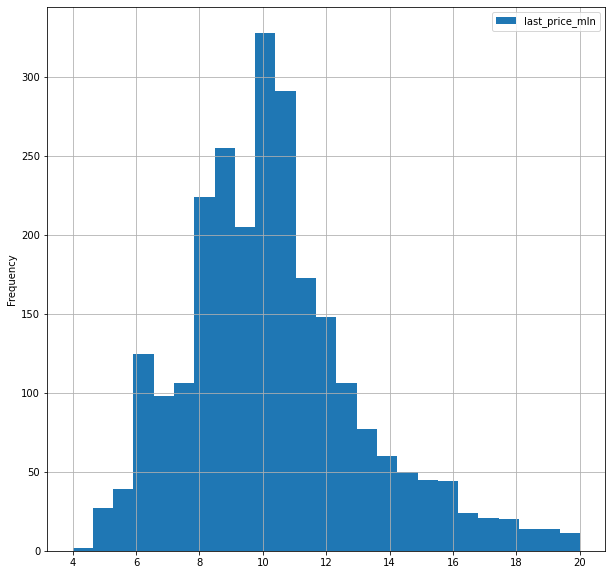

In [529]:
cost_factors_of_object.plot(kind = 'hist', x = 'total_area', y = 'last_price_mln', figsize = (10, 10), grid = True, bins = 25, range = (4, 20))

Здесь можно заметить, что самая распространенная стоимость в среднем будет иметь площадей 10 м^2 

<AxesSubplot:ylabel='Frequency'>

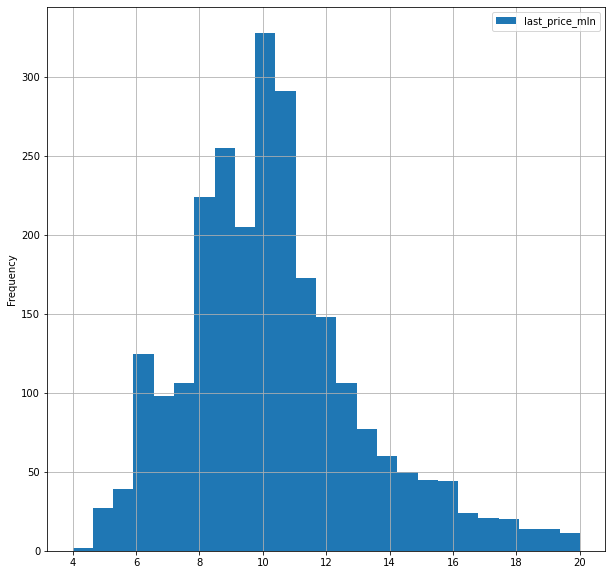

In [530]:
cost_factors_of_object.plot(kind = 'hist', x = 'living_area', y = 'last_price_mln', figsize = (10, 10), grid = True, bins = 25, range = (4, 20))

Здесь можно заметить, что самая распространенная жилая площадь в среднем является 10 м^2

<AxesSubplot:ylabel='Frequency'>

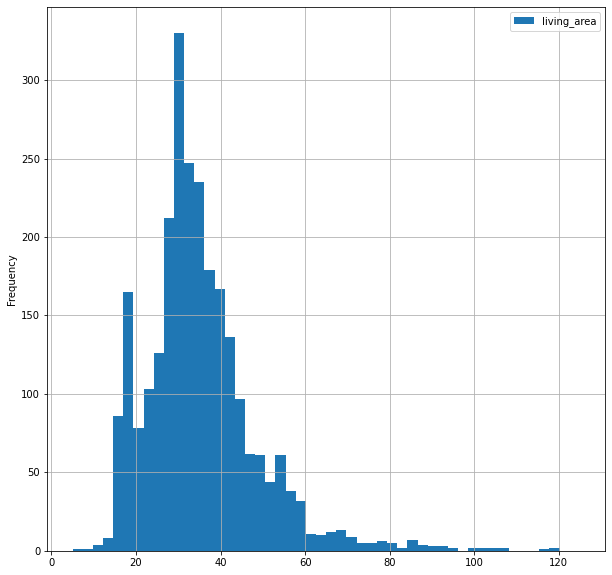

In [531]:
cost_factors_of_object.plot(kind = 'hist', x = 'last_price_mln', y = 'living_area', figsize = (10, 10), grid = True, bins = 50, range = (5, 125))

Здесь можно заметить, что самая распространенная жилая площадь в среднем будет стоить 30 млн рублей. Но также обнаружили резкий выброс около 19 млн рублей. Проверим, является ли аномальным значением или нет

In [532]:
blowout_living_area = data[(data['last_price'] > 17000000) & (data['last_price'] < 20000000)]
blowout_living_area[blowout_living_area['living_area'] == blowout_living_area['living_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_good_name,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication,type_floor,cityCenters_nearest_km,last_price_mln
20650,20,18250000.0,210.0,2018-12-30,6,2.7,16,160.0,16,True,...,320.0,NaN,санкт-петербург,86904.761905,Sunday,December,2018,Последний,23.0,нет категории


Оказывается, что нет. Просто этот дом является самым дорогим участком: 6 комнат, аппартамент, пруд в примерной шаговой доступности и недалеко к центру города (предположим, что апартамент находится в районе Шушары в Питере, то есть, ехать до Невского проспекта около 30 мин на машине)

<AxesSubplot:ylabel='Frequency'>

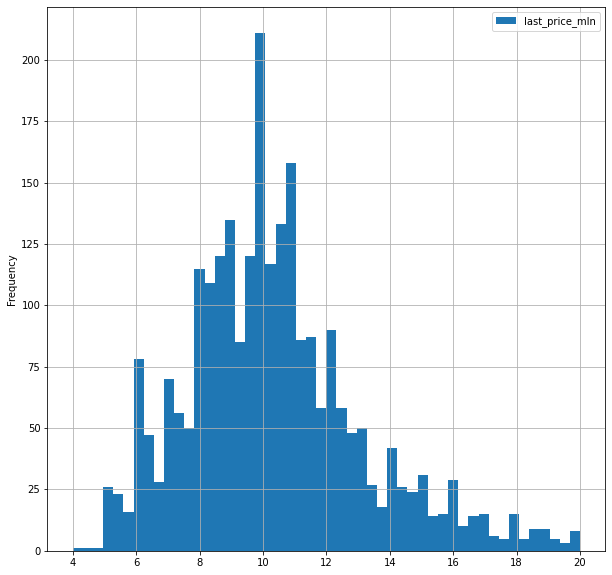

In [533]:
cost_factors_of_object.plot(kind = 'hist', x = 'kitchen_area', y = 'last_price_mln', figsize = (10, 10), grid = True, bins = 50, range = (4, 20))

Здесь можно заметить, что кухонная площадь 10 м^2 является самой дорогой

<AxesSubplot:ylabel='Frequency'>

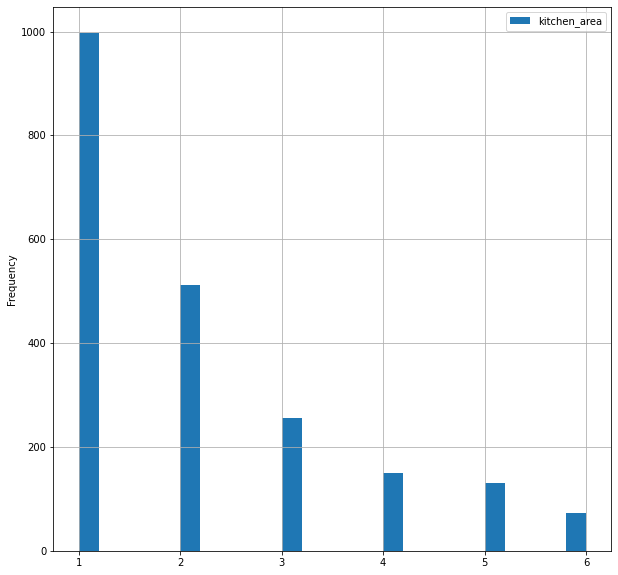

In [534]:
cost_factors_of_object.plot(kind = 'hist', x = 'last_price_mln', y = 'kitchen_area', figsize = (10, 10), grid = True, bins = 25, range = (1, 6))

Здесь можно заметить, что самая распространенная кухонная площадь в среднем будет стоить 2 млн рублей. Но по площади кухни примерно одинаково у дома, у которых стоимость составляет около 1 млн и 3 млн рублей  

<AxesSubplot:ylabel='Frequency'>

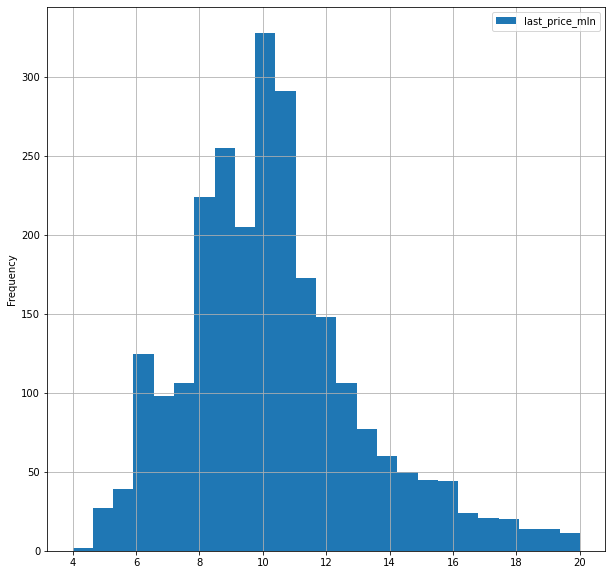

In [535]:
cost_factors_of_object.plot(kind = 'hist', x = 'rooms', y = 'last_price_mln', figsize = (10, 10), grid = True, bins = 25, range = (4, 20))

Здесь можно заметить, что количество 10 комнат в доме является самым дорогим

<AxesSubplot:ylabel='Frequency'>

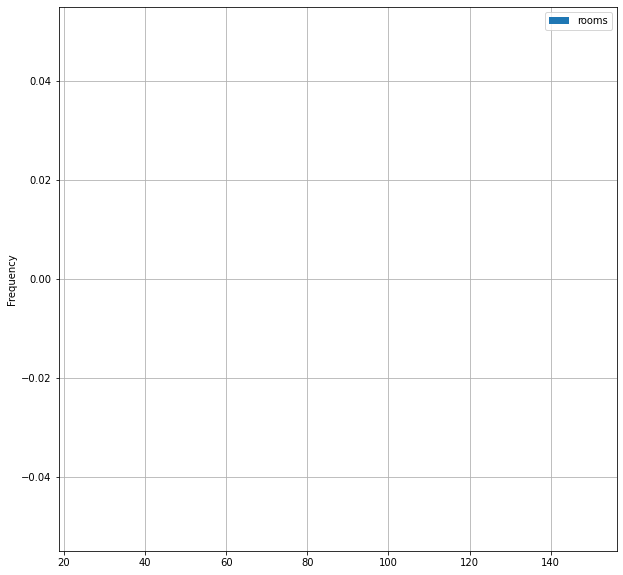

In [536]:
cost_factors_of_object.plot(kind = 'hist', x = 'last_price_mln', y = 'rooms', figsize = (10, 10), grid = True, bins = 50, range = (25, 150))

Здесь можно заметить, что самая распространеное количество комнат в среднем будет стоить 55 млн рублей.

<AxesSubplot:ylabel='Frequency'>

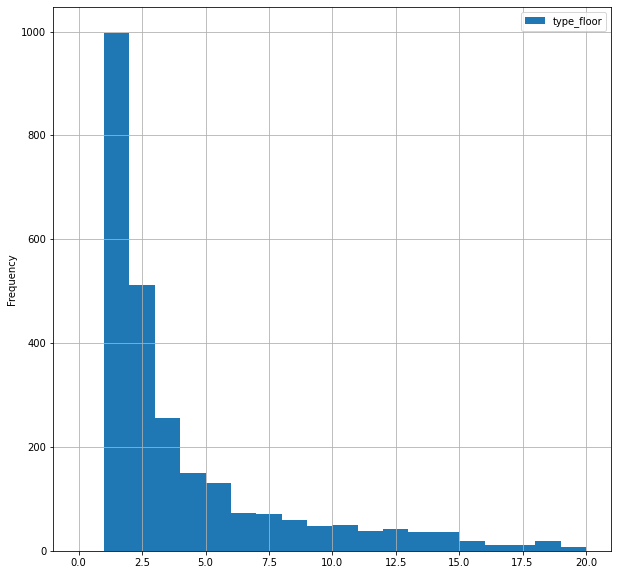

In [537]:
cost_factors_of_object.plot(kind = 'hist', x = 'last_price_mln', y = 'type_floor', figsize = (10, 10), grid = True, bins = 20, range = (0, 20))

Ревьюеру: Здесь я не понял, как связать данные, чтобы построить гистограмму, если у двух данных разного типа: численный и строковый. Попробую применять seaborn

<AxesSubplot:xlabel='type_floor', ylabel='last_price'>

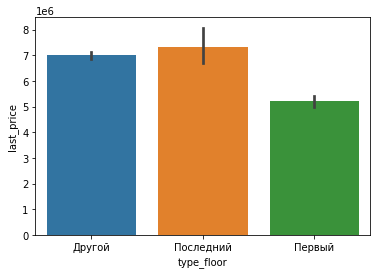

In [538]:
import seaborn as sb

sb.barplot(data = data, x = 'type_floor', y = 'last_price')

Здесь можно заметить, что реже всего объявляют о продажах дома на первом этаже. 

Последний этаж больше остальных, но у него сильное стандартное отклонение по сравнению остальных.

<AxesSubplot:xlabel='last_price', ylabel='day_of_publication'>

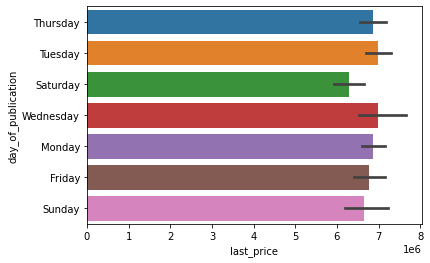

In [539]:
sb.barplot(data = data, x = 'last_price', y = 'day_of_publication')

Здесь можно заметить, что реже всего проводит публикация в воскресенье. А частые - среда. У остальных примерное более менее одинаковые значения

<AxesSubplot:xlabel='last_price', ylabel='month_of_publication'>

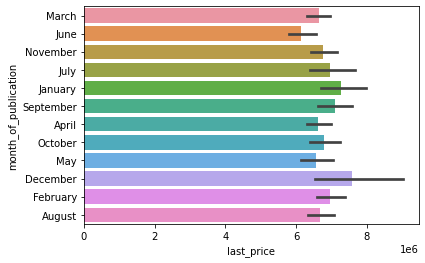

In [540]:
sb.barplot(data = data, x = 'last_price', y = 'month_of_publication')

Здесь можно заметить, что реже всего проводит публикация в июне. А частые - декабрь, но при этом имеет сильное стандартное отклонение

<AxesSubplot:ylabel='Frequency'>

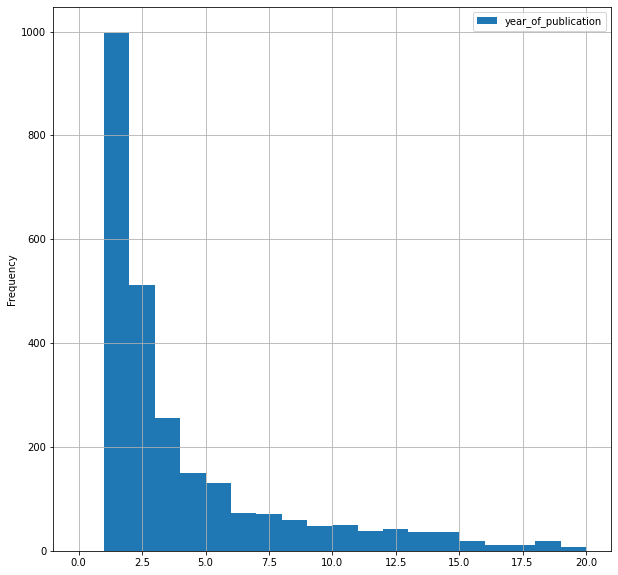

In [541]:
cost_factors_of_object.plot(kind = 'hist', x = 'last_price_mln', y = 'year_of_publication', figsize = (10, 10), grid = True, bins = 20, range = (0, 20))

Здесь можно заметить, что в объявлений о продажах часто публикуется дома со стоимостью около 1,25 млн рублей

Вычисляем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

In [542]:
locality_name_mean_price = data.pivot_table(index = 'locality_name', values = 'price_of_one_square_meter', aggfunc=['count', 'median'])
locality_name_mean_price.columns = ['count', 'median']
locality_name_mean_price = locality_name_mean_price.sort_values(by = 'count', ascending = False)
locality_name_mean_price.head(10)

,count,median
locality_name,,
санкт-петербург,7228,107739.274438
всеволожск,237,66173.285199
посёлок мурино,192,86157.557209
посёлок шушары,187,77753.779698
пушкин,143,103773.584906
посёлок парголово,122,91289.206642
деревня кудрово,121,91155.492154
сестрорецк,101,102521.008403
петергоф,99,83333.333333


Можно заметить, что Санкт-Петербург занимает 1 место по количеству объявлений о продажах - 7228 объявлений.

А в Колпино - последнее место по количеству объявлений о продажах - 97

In [543]:
city_spb = data[data['locality_name'] == 'санкт-петербург']
city_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_good_name,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication,type_floor,cityCenters_nearest_km,last_price_mln
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,755.0,NaN,санкт-петербург,120370.370370,Thursday,March,2019,Другой,16.0,нет категории
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121.0,санкт-петербург,100000.000000,Tuesday,June,2018,Другой,8.0,нет категории
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,553.0,137.0,санкт-петербург,127525.252525,Thursday,November,2017,Другой,14.0,нет категории
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,True,...,NaN,397.0,санкт-петербург,81707.317073,Thursday,November,2017,Первый,11.0,нет категории
19,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,True,...,NaN,97.0,санкт-петербург,117355.371901,Wednesday,January,2019,Другой,13.0,нет категории


In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10119 entries, 0 to 23697
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               10119 non-null  int64         
 1   last_price                 10119 non-null  float64       
 2   total_area                 10119 non-null  float64       
 3   first_day_exposition       10119 non-null  datetime64[ns]
 4   rooms                      10044 non-null  Int64         
 5   ceiling_height             10119 non-null  float64       
 6   floors_total               10110 non-null  Int64         
 7   living_area                10119 non-null  float64       
 8   floor                      10119 non-null  int64         
 9   is_apartment               10119 non-null  bool          
 10  studio                     10119 non-null  bool          
 11  open_plan                  10119 non-null  bool          
 12  kitc

Посчитаем среднюю цену на 1 м^2 населенного пункта: Санкт-Петебург и Колпино

In [568]:
city_spb['cost_of_km'] = data[data['locality_name'] == 'санкт-петербург']['last_price'] / data[data['locality_name'] == 'санкт-петербург']['cityCenters_nearest_km']

In [569]:
city_spb = city_spb.sort_values(by = 'cityCenters_nearest_km', ascending = False)

In [572]:
city_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_good_name,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication,type_floor,cityCenters_nearest_km,last_price_mln,cost_of_km
12160,8,2450000.0,43.0,2018-08-14,1,2.75,5,16.0,1,True,...,8.0,санкт-петербург,56976.744186,Tuesday,August,2018,Первый,29.0,нет категории,84482.758621
11652,16,4700000.0,51.0,2016-06-07,2,2.60,5,30.0,1,True,...,539.0,санкт-петербург,92156.862745,Tuesday,June,2016,Первый,29.0,нет категории,162068.965517
814,0,7600000.0,111.0,2017-07-26,3,3.00,16,63.0,12,True,...,66.0,санкт-петербург,68468.468468,Wednesday,July,2017,Другой,28.0,нет категории,271428.571429
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,True,...,128.0,санкт-петербург,193918.918919,Tuesday,November,2017,Другой,27.0,нет категории,531481.481481
7732,20,3975000.0,74.0,2018-08-20,3,3.20,3,43.8,2,True,...,112.0,санкт-петербург,53716.216216,Monday,August,2018,Другой,26.0,нет категории,152884.615385


<AxesSubplot:xlabel='cityCenters_nearest_km'>

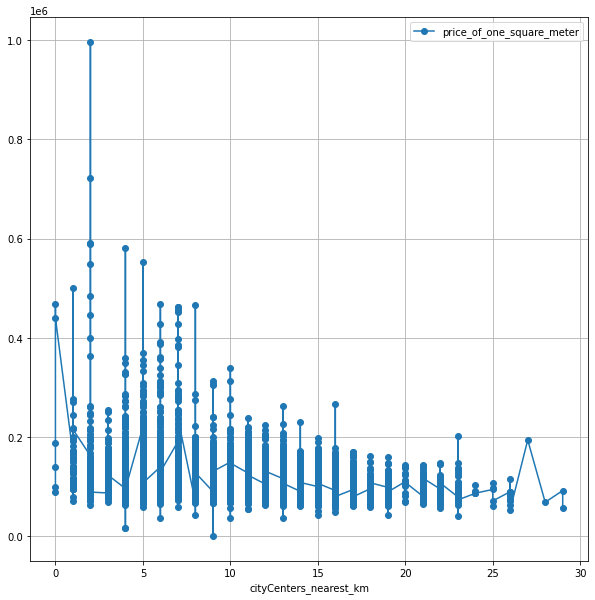

In [571]:
city_spb.plot(kind = 'line', style = '-o', x = 'cityCenters_nearest_km', y = 'price_of_one_square_meter', figsize = (10, 10), grid = True)

Ревьюеру: здесь получилось странный график, мне кажется что в данных есть какие-то аномальные значения, которых я пропустил? 

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод